<img align='right' style='max-width: 200px; height: auto' src='hsg_logo.png'>

# 7,861: Computer Vision

## Lab 03 - Tools of Image Processing

### Wednesday 18/10/2023

*Michael Mommert, Joëlle Hanna* - University of St. Gallen, Fall Term 2023


After today's lab, you should be able to:

- Understand and apply a convolutional filter to an image to blur or sharpen it.
- Enhance an image with histogram equalization, or denoising.
- Understand and implement a simple image compression method
- Learn how to resize images with different interpolation techniques


As always, don't hesitate to ask all your questions either during the lab, post them in our CANVAS (StudyNet) forum (https://learning.unisg.ch), or send us an email (using the course email).

# Submission:

Kindly submit your notebook by midnight on Tuesday, October 24, 2023 via e-mail to `joelle.hanna@unisg.ch`. 

IMPORTANT: Please save your file using the following format: lab03_firstname_lastname.ipynb.


# Content

1. [Image Enhancement](#image_enhancement)
    1. [Histogram Equalization](#histogram_equalization)
    2. [Gaussian Blurring](#gaussian_blurring)
    3. [Sharpening](#sharpening)
    4. [Denoising](#denoising)
    5. [Information Extraction](#information_extraction)
2. [Image Compression](#image_compression)


<a id='image_enhancement'></a>
# 1. Image Enhancement (7 points)


Image enhancement refers to the manipulation of digital images to render them more suitable for display or subsequent image analysis. This process encompasses actions such as noise reduction, sharpening, or increasing brightness, all of which contribute to the improved identification of essential features.

In this exercise, you will implement and test a selection of the most used techniques: 

In [712]:
import skimage.io as io
import matplotlib.pyplot as plt
import numpy as np
from scipy.signal import convolve2d
import math

plt.rcParams['figure.figsize'] = (10, 10)
plt.rcParams['image.cmap'] = 'gray'

<a id='histogram_equalization'></a>
## 1.A. Histogram Equalization

The first method you will implement is the histogram equalization. This is a valuable tool for images where both the background and foreground share similar brightness levels, either being bright or dark. More specifically, this method is very useful, for example to improve the visualization of bone structures in x-ray images.

*  Load the image _xray.jpg_ and display it

In [776]:
# Your Code HERE:

Remember the steps for histogram equalization shown in the lecture:


<img style='max-width: 800px; height: auto' src='hist_equalization.png'>

* Exercise 1.1: Use the `plt.hist()` function hist to display the histogram of the xray image. You may need to tune the `bins` argument (e.g. `bins=100`).

Note: `plt.hist()` expects a single column vector as input, so you need to flatten the array first.

In [777]:
# Your Code HERE:

Typically, a grayscale image takes on the discrete values ranging from 0 to L - 1, with L set to 256. However, it's evident that our X-ray image does not fully utilize this entire spectrum of gray tones. Let's try to enhance it. 

* Exercise 1.2: First, implement the missing parts in `get_cumsum()` method, which outputs the cumulative distribution function of an image (HINT: You can use the function `np.cumsum()`). Then use it on the Xray image and plot the output. 

In [141]:
def get_cumsum(image):
    # flatten the image array and calculate histogram using np.bincount()
    histogram_array = 

    # normalize by the total number of pixels
    histogram_array = 

    # compute the cumulative histogram
    c_histogram_array = 

    return c_histogram_array


In [142]:
c_histogram_array = get_cumsum(xray_im)

Plot the cumulative distribution - don't forget to label the axes!

In [778]:
# Your Code HERE:

* Exercise 1.3: Now we need to rescale (re-map) the pixel values, in order to 'equalize' the histogram

The equalized cumulative histogram should be linearly increasing across the full range of intensity (0, 255). As an intuition into how the mapping works, the minimum pixel intensity value of 115 is transformed to 0.0. The maximum pixel intensity value of 225 is transformed to 1.0. All the values in between are mapped accordingly between these two values. Once multiplied by the maximum possible intensity value (255), the resulting pixel intensities are now distributed across the full intensity range.

In [144]:
# Create a lookup table (transformation map) by scaling the cumulative histogram values to the [0, 255] range and converting them to unsigned 8-bit integers.
transform_map = 

# flatten the original image array into a 1D list
img_list = 

# transform pixel values to equalize the histogram, using the lookup table
eq_img_list = 

# reshape the eq_img_list into an array with the same dimension of the original image. 
eq_xray_im = np.reshape(np.asarray(eq_img_list), xray_im.shape)

Display both images (xray_im and eq_xray_im) next two each other. Don't forget to add titles!

In [779]:
# Your Code HERE:

* Exercise 1.4: Finally, compute using your `get_cumsum()` method and plot the cumulative distributions of the original and the enhanced image on the same plot, and confirm that the equalized one is indeed increasing linearly. Don't forget to add legend, labels and title to the plot!

In [151]:
# original: 
c_histogram_array = 

# enhanced (equalized):
eq_c_histogram_array = 

In [780]:
# now plot! 
# Your Code HERE:


<a id='gaussian_blurring'></a>
## 1.B. Gaussian Blurring

In this exercise, you'll be applying a different kind of image enhancement known as image blurring. This technique is commonly employed to reduce image noise and minimize intricate details. The outcome of this blurring method shoudl produce a soft and smooth blur. 

Applying a Gaussian blur to an image is the same as convolving the image with a Gaussian function. The input data is the image and the kernel/filter is the gaussian kernel.

Here is an implementation of a Gaussian filter, using the `generate_gaussian_filter()` method, which outputs a 2D filter of shape (filter_size x filter_size). 

Recall the formula: 

$ G(x, y) =  \frac{1}{2 \pi \sigma^2} e^{-\frac{x^2+y^2}{2 \sigma^2}}$

Remember that x is the distance from the origin in the horizontal axis, y is the distance from the origin in the vertical axis, and $\sigma$ is the standard deviation of the Gaussian distribution. It is important to note that the origin on these axes are at the center (0, 0). When applied in two dimensions, this formula produces a surface whose contours are concentric circles with a Gaussian distribution from the center point. 

In [ ]:
def generate_gaussian_filter(sigma, filter_size):
    m, n = filter_size

    m_half = m // 2
    n_half = n // 2

    gaussian_filter = np.zeros((m, n), np.float32)

    for y in range(-m_half, m_half):
        for x in range(-n_half, n_half):
            # Your Code HERE:
            normal = 1 / (2.0 * np.pi * sigma**2.0)
            exp_term = np.exp(-(x**2.0 + y**2.0) / (2.0 * sigma**2.0))
            gaussian_filter[y+m_half, x+n_half] = normal * exp_term

    return gaussian_filter

* Exercise 2.1: Generate Gaussian Filters with $\sigma = [5; 10; 15]$ and size of 40x40. Display them next to each other. (HINT: you may try to use the `gist_heat` cmap with `imshow`)

In [ ]:
# Your Code HERE:

Here is an implementation of the convolution 'by hand'. 

In [280]:
def convolution(image, kernel):

    assert len(image.shape) == 3
        
    m_i, n_i, c_i = image.shape
    m_k, n_k = kernel.shape

    y_strides = m_i - m_k + 1  # possible number of strides in y direction
    x_strides = n_i - n_k + 1  # possible number of strides in x direction

    img = image.copy()

    # Define the shape of the output tensor
    output_shape = (m_i-m_k+1, n_i-n_k+1, c_i)

    # Create an output tensor filled with zeros
    output = np.zeros(output_shape, dtype=np.float32)

    # Initialize a count to keep track of the number of convolution operations
    count = 0  

    # Reshape the output tensor for easier manipulation
    output_tmp = output.reshape(
        (output_shape[0]*output_shape[1], output_shape[2])
    )

    # Loop through all possible positions for the kernel in the input image
    for i in range(y_strides):
        for j in range(x_strides):
            for c in range(c_i): # looping over all channels
                # Perform the actual convolution:
                sub_matrix = img[i:i+m_k, j:j+n_k, c]
                output_tmp[count, c] = np.sum(sub_matrix * kernel)

            count += 1

    output = output_tmp.reshape(output_shape)

    return output


* Exercise 2.2: Final step is to actually blur an image. Let's start by reading the `peppers.tiff` image, then apply a gaussian filter on it with varying sigma values. 
Display the original image, and three gradually blurred versions of it (varying sigma). It may take ~1min to run.

In [781]:
# Your Code HERE:

* Exercise 2.4: Deduce what type of filter is Gaussian blur? And why?

[Your Answer Here]

<a id='sharpening'></a>
## 1.C. Sharpening

Another form of enhancement is image sharpening, which encompasses various techniques to accentuate edges and fine details within an image. This concept is very similar to the image blurring method discussed earlier, with the main difference lying in the kernel employed. Therefore, let's define a new kernel and make use of the convolution function previously implemented in section 1.B.

* Exercise 3.1: Sharpen the image `peppers.tiff` using K as kernel, and display the original next to the sharpened one:

    $$K = \begin{bmatrix}
    0 & -1 & 0 \\
    -1 & 5 & -1 \\
    0 & -1 & 0  \end{bmatrix}
    $$

In [782]:
# Your Code HERE:
img_sharpened = 

In [783]:
# Plot here!

As you have seen in the lecture, you can also sharpen an image by unsharp masking. As a reminder, unsharp masking works as follows:

sharpened image = original image + (original image – blurred image) * amount

* Exercise 3.2: Sharpen the image `peppers.tiff` using unsharp masking. First, create a blurred image using the `convolve2d` function from the `scipy.signal` library, specifying `mode='same'`, and a gaussian kernel. This mode will add padding to the image and maintain the convolution's output size identical to the original image, a crucial step for unsharp masking. 

(HINT: You may need to loop through each color channel (R, G, B))

In [784]:
from scipy.signal import convolve2d

# Your Code HERE:

kernel = generate_gaussian_filter(5, (40, 40))
blurred_image = 

* Display the original image next to sharpened ones with amount  $\in [1; 3; 6]$. Don't forget to add titles!

In [785]:
# Your Code HERE:

<a id='denoising'></a>
## 1.D. Denoising

Median filtering is a widely-used method in image processing for denoising purposes. It involves replacing each pixel in an image with the median value of its neighboring pixels, making it effective in removing salt-and-pepper noise while preserving important image details.

Start by loading and displaying the `noisy_chapelin.png` image.

In [790]:
# Your code HERE:
noisy_img = 

* Exercise 4.1: Implement Median filtering, to remove the 'salt and pepper' noise in the image.  Essentially, for every 3X3 area,  find the median value of the pixels and replace the center pixel by the median.

In [786]:
height, width = noisy_img.shape

denoised_img = np.zeros([height, width])
  
# Your code HERE:

In [787]:
fig, axes = plt.subplots(1, 2)
axes[0].imshow(noisy_img)
axes[0].set_title('Noisy Image')
axes[1].imshow(denoised_img)
axes[1].set_title('Denoised Image')

<a id='information_extraction'></a>
## (BONUS) 1.E. Information Extraction

* Exercise 5: In this exercise, you will try to enhance and extract information from a difficult-to-read licence plate image. Licence plate recognition is very important for security, law-enforcement, or even traffic management. But sometimes, the image you receive from a camera is corrupted, noisy, blurry, unreadable. Your job is to try to extract the licence plate number from the `noisy_car.jpg` image. You are free to use any method you want, from any library you want! Use existing implementation, such as for example `scipy.ndimage.median_filter' for median filtering. Play with the available parameters, and don't be afraid to apply the same method iteratively!


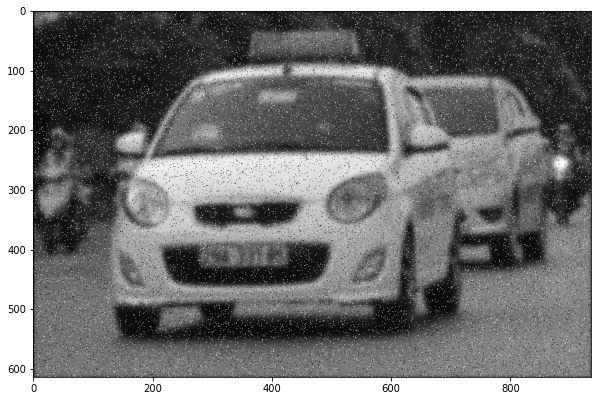

In [523]:
noisy_car = io.imread('noise_img.png')
plt.imshow(noisy_car)

What is your guess for the licence plate number?

[Your Answer HERE]

<a id='image_compression'></a>
# 2. Image Compression (3 points)

In this exercise, you will learn to use two-dimensional Discrete Cosine Transform (2D DCT) to carry out image compression and reconstruction.

First, read and display `imgB_prenoise.png` image

In [789]:
# Your Code HERE:
img = 

In [691]:
from scipy.fftpack import dct, idct

# 2D DCT
def dct2(a):
    return dct(dct(a.T, norm='ortho').T, norm='ortho')

# 2D IDCT
def idct2(a):
    return idct(idct(a.T, norm='ortho').T, norm='ortho')

* Exercise 6.1: Complete the missing parts in the `compress_images()` function. It should compute the discrete cosine transforme using the pre-defined `dct2()` function on 8x8 patches in an image. For each patch, the function should retain the K largest DCT coefficients, while setting the remaining 64 - K coefficients to zero to ensure the patch remains 8x8 in size.

In [692]:
B = 8
height, width = img.shape

In [ ]:
# number of 8x8 blocks
blocksV = int(height / B)
blocksH = int(width / B)

def compress_image(img, k):
    transformed_img = np.zeros(img.shape, np.float32)
    for row in range(blocksV):
        for col in range(blocksH):
            # Your Code HERE:
    return transformed_img

* Exercise 6.2: Write a function that computes the inverse discrete cosine transforme using the pre-defined `idct2()` function on 8x8 patches in an image. This serves as the reconstruction step, after compression.

In [697]:
def reconstruct_image(transformed_img):
    inv_transformed_img = np.zeros(img.shape, np.float32)
    for row in range(blocksV):
        for col in range(blocksH):
            # Your Code HERE:
    return inv_transformed_img

* Exercise 6.3: Display the original image, along with reconstructed (after compression) images for K = 64, 16, 2. For each reconstructed image, calculate the Mean Absolute Deviation (MAD) (see equation [here](https://en.wikipedia.org/wiki/Average_absolute_deviation)) between the original image and the reconstructed one. Then plot the MAD with respect to K.

In [791]:
# Your Code HERE:

In [792]:
# Plot HERE MAD with respect to K. Don't forget to label the axes!